In [1]:
'''Example code for creating a series of intensity maps with an AO system and atmosphere'''

import sys, os
import numpy as np
sys.path.append(os.environ['MEDIS_DIR']) #/Users/dodkins/PythonProjects/MEDIS/medis
from params import tp, mp, cp, sp, ap, iop

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from Utils.plot_tools import loop_frames, quicklook_im, view_datacube, compare_images, indep_images, grid
import pickle
from Utils.misc import dprint
import Detector.readout as read
import Detector.get_photon_data as gpd
# import Analysis.phot
# from vip_hci import phot, pca

/Users/dodkins/miniconda3/lib/python3.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
# Parameters specific to this script
sp.show_wframe = True # for each timestep all wavelength frames are summed and the map displayed 
sp.save_obs = False
sp.show_cube=False # for each timestep all wavelength frames are shown
sp.get_ints= {'w':[0],
              'c':[0]} # if you want to look screens at different stages of the telescope 
ap.companion = False # Set to true if you want planets with the following contrast and seps 
ap.contrast = [10**-4.1,10**-4.1,10**-4.1]  # [0.1,0.1]
ap.lods = [[-3.2,3.2],[-3.2,0.3],[-4.2,-6.2]]#[6,-4.5],
tp.diam=8.
tp.grid_size=148 # may need to increase this
tp.beam_ratio =0.5 # smaller beam_ratio decreases the size of the beam relative to the grid in the pupil plane and stretchs the PSF in the focal plane
tp.use_spiders = True
tp.use_ao = False # set to True when you want to include AO 
tp.ao_act = 50
tp.platescale=10 # mas # isn't actually used by PROPER yet
tp.detector = 'ideal' # other options: MKIDs, H2RG
tp.use_atmos = True
tp.use_zern_ab = False
tp.occulter_type = 'Vortex'#"None (Lyot Stop)"
tp.aber_params = {'CPA': False, #toggle for optic aberations 
                'NCPA': False, #toggle for optic aberations 
                'QuasiStatic': False,  # or Static
                'Phase': True,
                'Amp': False,
                'n_surfs': 4,
                'OOPP': [16,8,4,16]}#False}#
tp.aber_vals = {'a': [5e-18, 1e-19], # The PROPER documentation explains these terms. 
                'b': [2.0, 0.2], # they have been adjusted to produce a realistic looking focal plane map
                'c': [3.1, 0.5],
                'a_amp': [0.05, 0.01]}
mp.date = 'simpleSystem' # the folder name where science data is saved
iop.update(mp.date)
sp.num_processes = 1 #the number of cores to use. I believe setting this to 2 on a single core multithreads? May have some issues with saving pkl files
num_exp =10
cp.frame_time = 0.05 # (s) the base time of the simulation
ap.exposure_time = 0.1 # (s) allows the integration of several time samples
ap.numframes = int(num_exp * ap.exposure_time / cp.frame_time) # 10 * 0.1/0.05
cp.date = '180828/' #the directory containing the atmospheric phase maps for each time step
cp.atmosdir= os.path.join(cp.rootdir,cp.data,cp.date)

tp.piston_error = True #add some Gaussian uncertainty to the piston heights
tp.band = np.array([700, 1500])
tp.nwsamp = 1 # e.g 4 the number of wavelengths that are used by proper
tp.w_bins = 1 # e.g. 12 interpolate the spectral cube from proper to get more wavelength samples
tp.rot_rate = 0  # deg/s
tp.pix_shift = None # for dithering

<ipython-input-3-00cb5fab10f3>:6 - /Users/dodkins/ScienceData/medis/Processed/simpleSystem/simpleSystem.h5
True /Users/dodkins/ScienceData/medis/Processed/simpleSystem/simpleSystem.h5
20
/Users/dodkins/PythonProjects/MEDIS/medis/Detector/readout.py:395 - .h5
/Users/dodkins/PythonProjects/MEDIS/medis/Detector/readout.py:402 - (20, 1, 148, 148)
/Users/dodkins/PythonProjects/MEDIS/medis/Detector/readout.py:403 - 7.351755087343874
<ipython-input-3-00cb5fab10f3>:8 - (20, 1, 148, 148)
20 5
4
/Users/dodkins/PythonProjects/MEDIS/medis/Utils/plot_tools.py:392 - (5.637906518890948e-14, 0.010330320013026648)


/Users/dodkins/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


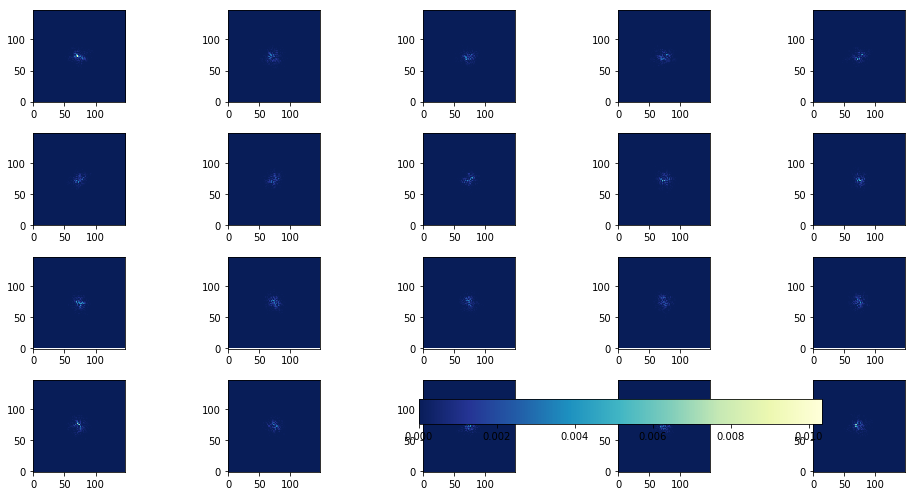

<ipython-input-3-00cb5fab10f3>:16 - (148, 148)


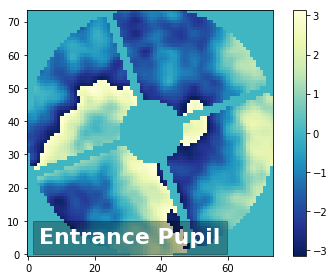

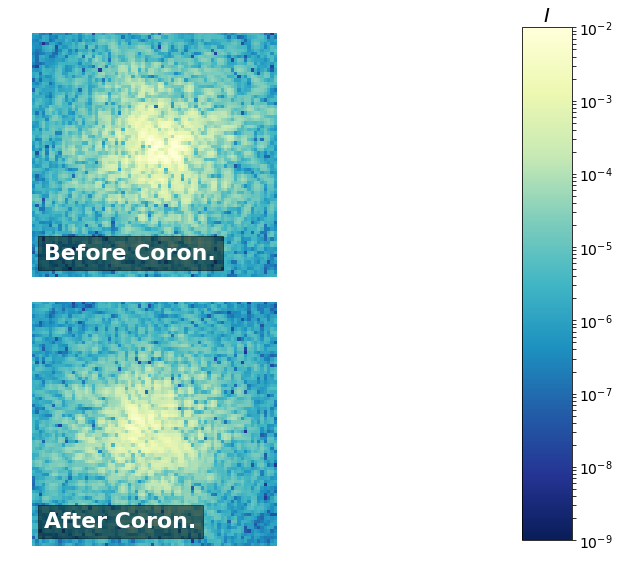

In [3]:
if __name__ == '__main__':
#     if os.path.exists(iop.int_maps):
#         os.remove(iop.int_maps)

    iop.hyperFile = iop.datadir + '/simpleSystem.h5'
    dprint(iop.hyperFile)
    hyper = read.get_integ_hypercube(plot=False)[:, :]
    dprint(hyper.shape)
    view_datacube(hyper[:,0])
#     ideal = gpd.take_obs_data()[0, :]

    with open(iop.int_maps, 'rb') as handle:
        int_maps =pickle.load(handle)
        
    int_maps = np.array(int_maps)
    dprint(int_maps[0].shape)
    # view_datacube(int_maps, logAmp=True)
    quicklook_im(int_maps[::-1][0,tp.grid_size//4:-tp.grid_size//4,tp.grid_size//4:-tp.grid_size//4], title=r'$\phi$',annos=['Entrance Pupil'],
         vmin=-3.14, vmax=3.14, show=False, anno='Entrance Pupil')
    grid(int_maps[::-1][4:,tp.grid_size//4:-tp.grid_size//4,tp.grid_size//4:-tp.grid_size//4], nrows =2, width=1,
         titles=r'$I$', annos=['Before Coron.', 'After Coron.'],
         logAmp=True, vmins=[1e-9]*2, vmaxs=[1e-2]*2)
    plt.show(block=True)